# 1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
time = pd.read_csv("delivery_time.csv")
time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
time.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [4]:
time.columns = ['delivery_time','sorting_time']

In [5]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
time.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
time.shape

(21, 2)

In [8]:
time.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [9]:
time[time.duplicated()]

,delivery_time,sorting_time


# Out Liers Detection

<AxesSubplot:>

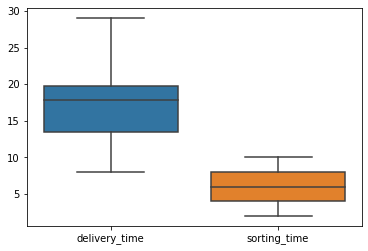

In [10]:
sns.boxplot(data=time)

# Applying Transformation

In [11]:
time['st_sq']=time.sorting_time**2
time['st_sqrt']=time.sorting_time**0.5
time['st_log']=np.log(time.sorting_time)
time['st_sqrt4']=time.sorting_time**0.4

In [12]:
time

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4
0,21.00,10,100,3.162278,2.302585,2.511886
1,13.50,4,16,2.000000,1.386294,1.741101
2,19.75,6,36,2.449490,1.791759,2.047673
3,24.00,9,81,3.000000,2.197225,2.408225
4,29.00,10,100,3.162278,2.302585,2.511886
5,15.35,6,36,2.449490,1.791759,2.047673
6,19.00,7,49,2.645751,1.945910,2.177906
7,9.50,3,9,1.732051,1.098612,1.551846
8,17.90,10,100,3.162278,2.302585,2.511886
9,18.75,9,81,3.000000,2.197225,2.408225


# Correlation Analysis

In [13]:
time.corr()

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4
delivery_time,1.000000,0.825997,0.793906,0.834150,0.833933,0.834847
sorting_time,0.825997,1.000000,0.983967,0.994704,0.977447,0.992266
st_sq,0.793906,0.983967,1.000000,0.960816,0.925659,0.954766
st_sqrt,0.834150,0.994704,0.960816,1.000000,0.993904,0.999768
st_log,0.833933,0.977447,0.925659,0.993904,1.000000,0.996045
st_sqrt4,0.834847,0.992266,0.954766,0.999768,0.996045,1.000000


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

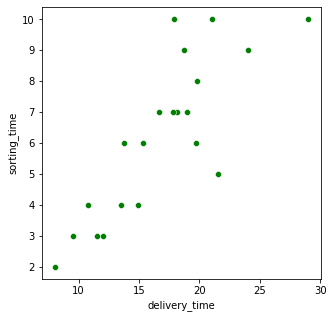

In [14]:
plt.figure(figsize =(5,5))
sns.scatterplot(time['delivery_time'],time['sorting_time'],color='green')

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

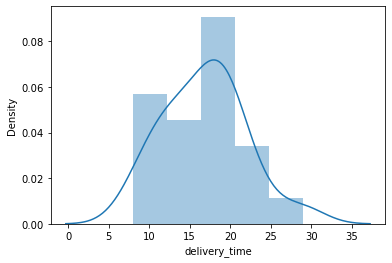

In [15]:
sns.distplot(time['delivery_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

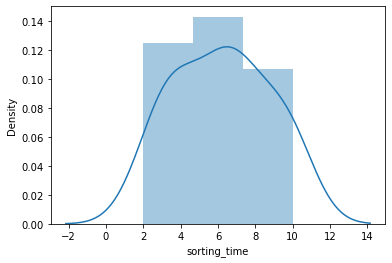

In [16]:
sns.distplot(time['sorting_time'])

(array([3., 5., 5., 6., 1., 1.]),
 array([ 8. , 11.5, 15. , 18.5, 22. , 25.5, 29. ]),
 <BarContainer object of 6 artists>)

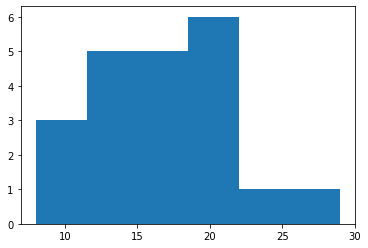

In [17]:
plt.hist(time['delivery_time'],bins=6)

(array([4., 3., 1., 7., 1., 5.]),
 array([ 2.        ,  3.33333333,  4.66666667,  6.        ,  7.33333333,
         8.66666667, 10.        ]),
 <BarContainer object of 6 artists>)

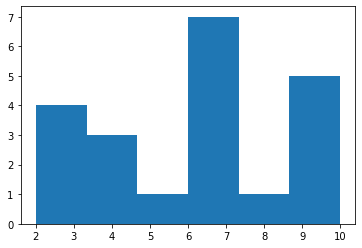

In [18]:
plt.hist(time['sorting_time'],bins=6)

# Model Building and Model Testing

In [19]:
model1=smf.ols('delivery_time~sorting_time',data=time).fit()
print(model1.tvalues)
print(model1.pvalues)
print(model1.rsquared)
print(model1.rsquared_adj)

Intercept       3.823349
sorting_time    6.387447
dtype: float64
Intercept       0.001147
sorting_time    0.000004
dtype: float64
0.6822714748417231
0.6655489208860244


In [20]:
model1_sq=smf.ols('delivery_time~st_sq',data=time).fit()
print(model1_sq.tvalues)
print(model1_sq.pvalues)
print(model1_sq.rsquared)
print(model1_sq.rsquared_adj)

Intercept    9.398601
st_sq        5.691330
dtype: float64
Intercept    1.415704e-08
st_sq        1.739194e-05
dtype: float64
0.6302871815826637
0.6108286121922777


In [21]:
model1_sqrt=smf.ols('delivery_time~st_sqrt',data=time).fit()
print(model1_sqrt.tvalues)
print(model1_sqrt.pvalues)
print(model1_sqrt.rsquared)
print(model1_sqrt.rsquared_adj)

Intercept   -0.840911
st_sqrt      6.592434
dtype: float64
Intercept    0.410857
st_sqrt      0.000003
dtype: float64
0.6958062276308671
0.6797960290851233


In [22]:
model1_log=smf.ols('delivery_time~st_log',data=time).fit()
print(model1_log.tvalues)
print(model1_log.pvalues)
print(model1_log.rsquared)
print(model1_log.rsquared_adj)

Intercept    0.472460
st_log       6.586789
dtype: float64
Intercept    0.641980
st_log       0.000003
dtype: float64
0.6954434611324223
0.6794141696130761


In [23]:
model1_sqrt4=smf.ols('delivery_time~st_sqrt4',data=time).fit()
print(model1_sqrt4.tvalues)
print(model1_sqrt4.pvalues)
print(model1_sqrt4.rsquared)
print(model1_sqrt4.rsquared_adj)

Intercept   -1.926237
st_sqrt4     6.610589
dtype: float64
Intercept    0.069169
st_sqrt4     0.000003
dtype: float64
0.6969691412160729
0.6810201486484978


# Model Prediction

In [24]:
time['predicted']=model1_sqrt4.fittedvalues
time

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4,predicted
0,21.00,10,100,3.162278,2.302585,2.511886,22.467100
1,13.50,4,16,2.000000,1.386294,1.741101,13.409355
2,19.75,6,36,2.449490,1.791759,2.047673,17.011974
3,24.00,9,81,3.000000,2.197225,2.408225,21.248938
4,29.00,10,100,3.162278,2.302585,2.511886,22.467100
5,15.35,6,36,2.449490,1.791759,2.047673,17.011974
6,19.00,7,49,2.645751,1.945910,2.177906,18.542394
7,9.50,3,9,1.732051,1.098612,1.551846,11.185352
8,17.90,10,100,3.162278,2.302585,2.511886,22.467100
9,18.75,9,81,3.000000,2.197225,2.408225,21.248938


In [25]:
new=pd.DataFrame({'sorting_time':[7,6.5]})
new['st_sqrt4']=new.sorting_time**0.4
new

,sorting_time,st_sqrt4
0,7.0,2.177906
1,6.5,2.114294


In [26]:
new['predicted']=model1_sqrt4.predict(new)
new

,sorting_time,st_sqrt4,predicted
0,7.0,2.177906,18.542394
1,6.5,2.114294,17.794862


# 2) Salary_hike -> Build a prediction model for Salary_hike

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
salary = pd.read_csv("Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
salary.shape

(30, 2)

In [30]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [31]:
salary.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

# Checking outlier 

<AxesSubplot:>

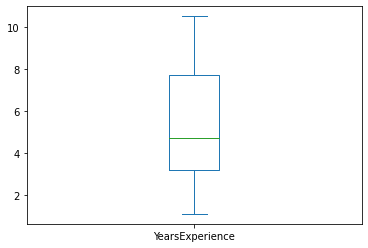

In [32]:
salary.YearsExperience.plot(kind='box')

<AxesSubplot:>

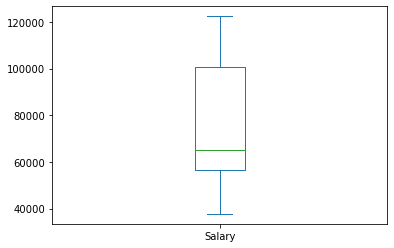

In [33]:
salary.Salary.plot(kind='box')

In [34]:
# Checking Correlation 
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

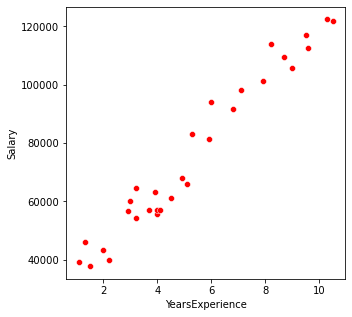

In [35]:
plt.figure(figsize=(5,5))
sns.scatterplot(salary['YearsExperience'],salary['Salary'],color='Red')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


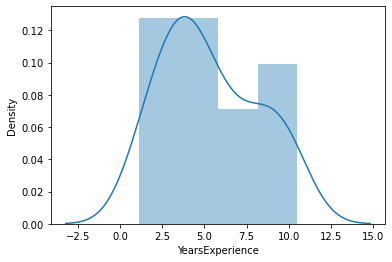

In [36]:
sns.distplot(salary['YearsExperience'])
salary.corr()

<AxesSubplot:xlabel='Salary', ylabel='Density'>

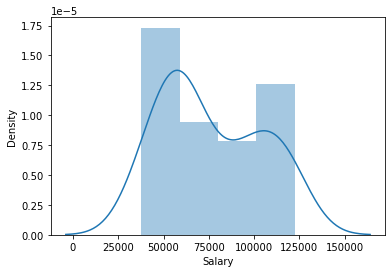

In [37]:
sns.distplot(salary['Salary'])

# Years and salary seems to be highly correlated

# Trying different transformations

In [38]:
import numpy as np
salary['ye_sq']=salary.YearsExperience**2
salary['ye_sqrt']=salary.YearsExperience**0.5
salary['ye_log']=np.log(salary.YearsExperience)

In [39]:
salary.corr()

,YearsExperience,Salary,ye_sq,ye_sqrt,ye_log
YearsExperience,1.000000,0.978242,0.977067,0.989850,0.953797
Salary,0.978242,1.000000,0.956724,0.964884,0.924061
ye_sq,0.977067,0.956724,1.000000,0.937950,0.872019
ye_sqrt,0.989850,0.964884,0.937950,1.000000,0.986620
ye_log,0.953797,0.924061,0.872019,0.986620,1.000000


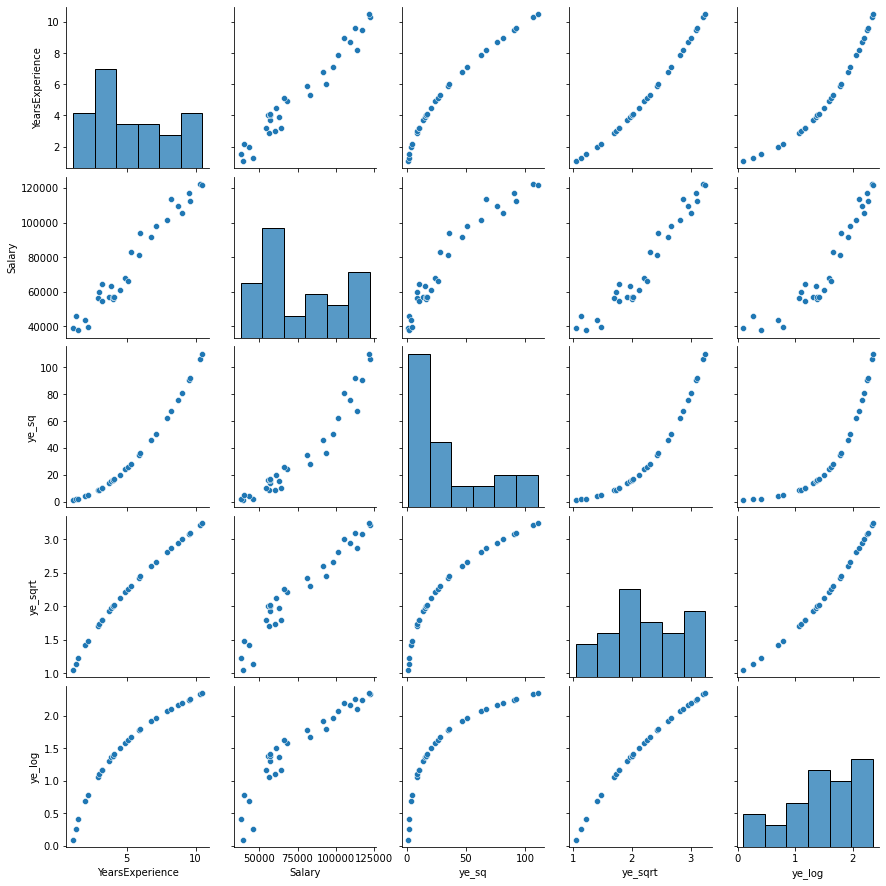

In [40]:
sns.pairplot(salary)

# Model Creation 

In [41]:
model1=smf.ols("Salary~YearsExperience",data=salary).fit()
model1_sqrt=smf.ols('Salary~ye_sqrt',data=salary).fit()
model_sq=smf.ols('Salary~ye_sq',data=salary).fit()

In [42]:
print(model1.rsquared,model1_sqrt.rsquared,model_sq.rsquared)

0.9569566641435086 0.9310009544993526 0.9153198857852565


# Unstransformed data has higher rsquared value even though others had similar or higher correlation

# rsquared value is above 95%

In [43]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [44]:
model1.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

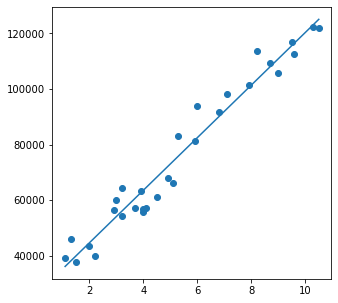

In [47]:
fig=plt.figure(figsize=(5,5))
plt.plot(salary["YearsExperience"],model1.fittedvalues)
plt.scatter(salary["YearsExperience"],salary.Salary)

In [48]:
model1.resid
model1.rsquared
model1.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [50]:
salary["predicted"]=model1.fittedvalues

In [51]:
salary

,YearsExperience,Salary,ye_sq,ye_sqrt,ye_log,predicted
0,1.1,39343.0,1.21,1.048809,0.095310,36187.158752
1,1.3,46205.0,1.69,1.140175,0.262364,38077.151217
2,1.5,37731.0,2.25,1.224745,0.405465,39967.143681
3,2.0,43525.0,4.00,1.414214,0.693147,44692.124842
4,2.2,39891.0,4.84,1.483240,0.788457,46582.117306
5,2.9,56642.0,8.41,1.702939,1.064711,53197.090931
6,3.0,60150.0,9.00,1.732051,1.098612,54142.087163
7,3.2,54445.0,10.24,1.788854,1.163151,56032.079627
8,3.2,64445.0,10.24,1.788854,1.163151,56032.079627
9,3.7,57189.0,13.69,1.923538,1.308333,60757.060788


# predicting for a new data

In [52]:
new = pd.DataFrame({'YearsExperience':[3,4.5]})

In [53]:
model1.predict(new)

0    54142.087163
1    68317.030645
dtype: float64

In [54]:
new['predict']=model1.predict(new)

In [55]:
new

,YearsExperience,predict
0,3.0,54142.087163
1,4.5,68317.030645
